In [1]:
from comer.datamodule import vocab
from comer.lit_comer import LitCoMER
from torchvision.transforms import ToTensor
import torch
from PIL import Image
from IPython.display import display

In [2]:
ckpt = '../lightning_logs/version_0/checkpoints/epoch=151-step=57151-val_ExpRate=0.6365.ckpt'

In [3]:
model = LitCoMER.load_from_checkpoint(ckpt)
model = model.eval()
device = torch.device("cpu")
model = model.to(device)

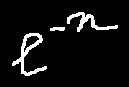

In [7]:
img = Image.open('18_em_4.bmp')
display(img)

In [8]:
img = ToTensor()(img)
mask = torch.zeros_like(img, dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), mask)[0]
pred_latex = vocab.indices2label(hyp.seq)

In [9]:
print(pred_latex)

e ^ { - n }
